In [37]:
import pandas as pd
import os
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [38]:
# Baca file train_labels.csv
df = pd.read_csv('/content/train_labels.csv')
df.head()


,article_id,dataset_id,type
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary
1,10.1002_anie.201916483,https://doi.org/10.5517/ccdc.csd.cc1npvt0,Missing
2,10.1002_anie.202005531,https://doi.org/10.5517/ccdc.csd.cc24wxqp,Missing
3,10.1002_anie.202007717,https://doi.org/10.5517/ccdc.csd.cc24rrb0,Missing
4,10.1002_chem.201902131,https://doi.org/10.5517/ccdc.csd.cc221dk3,Missing


In [39]:
texts = []
labels = []

for idx, row in df.iterrows():
    article_id = row['article_id']
    label = row['type']
    file_path = f'/content/{article_id}.xml'  # File XML harus sesuai nama article_id

    if os.path.exists(file_path):
        try:
            tree = ET.parse(file_path)
            root = tree.getroot()
            # Gabungkan semua isi teks dalam elemen XML
            sentences = [elem.text.strip() for elem in root.iter() if elem.text]
            full_text = " ".join(sentences)

            texts.append(full_text)
            labels.append(label)
        except:
            print(f"⚠️ Gagal parsing file: {file_path}")
    else:
        print(f"❌ File tidak ditemukan: {file_path}")


❌ File tidak ditemukan: /content/10.1002_ecs2.1280.xml
❌ File tidak ditemukan: /content/10.1002_ejoc.202000139.xml
❌ File tidak ditemukan: /content/10.1002_esp.5058.xml
❌ File tidak ditemukan: /content/10.1002_nafm.10870.xml
❌ File tidak ditemukan: /content/10.1007_jhep07(2018)134.xml
❌ File tidak ditemukan: /content/10.1007_jhep07(2018)134.xml
❌ File tidak ditemukan: /content/10.1007_jhep11(2018)113.xml
❌ File tidak ditemukan: /content/10.1007_jhep11(2018)113.xml
❌ File tidak ditemukan: /content/10.1007_jhep11(2018)115.xml
❌ File tidak ditemukan: /content/10.1007_jhep12(2018)117.xml
❌ File tidak ditemukan: /content/10.1007_s00382-012-1636-1.xml
❌ File tidak ditemukan: /content/10.1007_s10904-014-0054-8.xml
❌ File tidak ditemukan: /content/10.1016_j.fuel.2022.125768.xml
❌ File tidak ditemukan: /content/10.1016_j.fuel.2022.125768.xml
❌ File tidak ditemukan: /content/10.1016_j.jlp.2022.104761.xml
❌ File tidak ditemukan: /content/10.1016_j.jlp.2022.104761.xml
❌ File tidak ditemukan: /cont

In [40]:
# Gabungkan teks dan label jadi satu DataFrame
data = pd.DataFrame({'text': texts, 'label': labels})
data.head()


,text,label
0,Assessing the variability in the relations...,Primary
1,Angew Chem Int Ed Engl Angew. Chem. Int. Ed. E...,Missing
2,BioC-API 20250509 collection.key PMC7540508 CC...,Missing
3,Angew Chem Int Ed Engl Angew Chem Int Ed Engl ...,Missing
4,Chemistry Chemistry 10.1002/(ISSN)1521-3765 CH...,Missing


In [41]:
data['label'].value_counts()


,count
label,
Secondary,423
Missing,257
Primary,222


In [42]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])  # Teks diubah ke bentuk numerik
y = data['label']                           # Label sebagai target


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [44]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [45]:
y_pred = model.predict(X_test)

print("✅ Akurasi:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Akurasi: 0.9392265193370166

📊 Classification Report:
               precision    recall  f1-score   support

     Missing       0.91      0.98      0.94        52
     Primary       0.89      0.91      0.90        44
   Secondary       0.99      0.93      0.96        85

    accuracy                           0.94       181
   macro avg       0.93      0.94      0.93       181
weighted avg       0.94      0.94      0.94       181



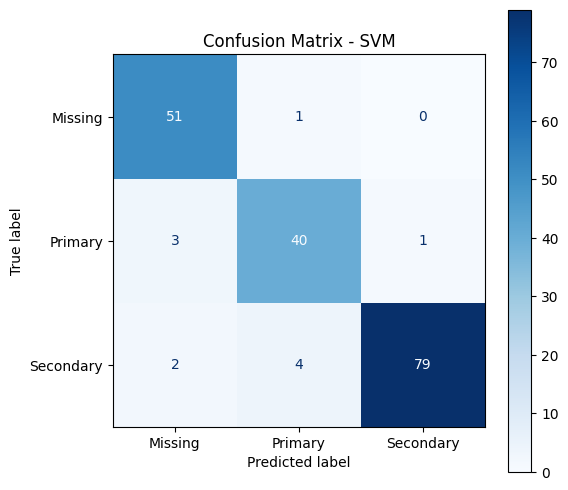

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM")
plt.show()


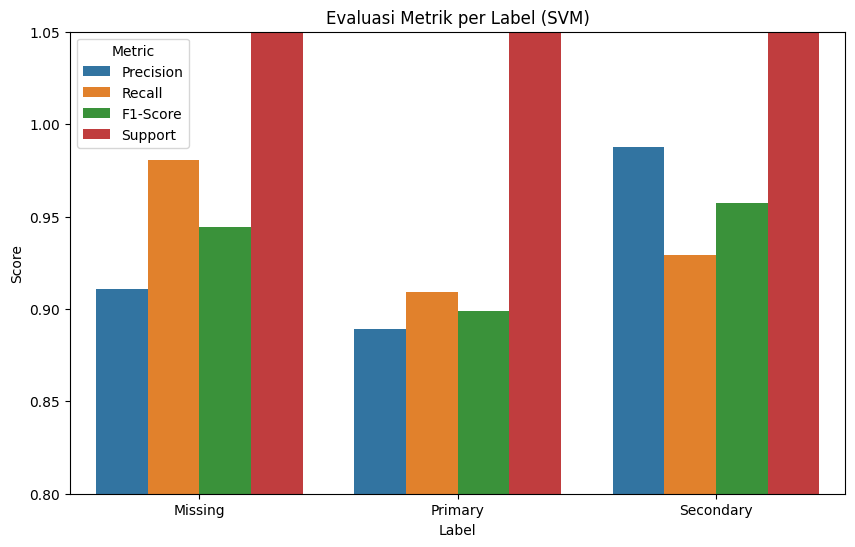

In [51]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Ambil metrik per label
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=model.classes_)

# Masukkan ke DataFrame
metrics_df = pd.DataFrame({
    'Label': model.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.melt(id_vars='Label'), x='Label', y='value', hue='variable')
plt.title('Evaluasi Metrik per Label (SVM)')
plt.ylabel('Score')
plt.ylim(0.8, 1.05)
plt.legend(title='Metric')
plt.show()
